In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.legend import Legend
import matplotlib.pyplot as plt

In [2]:
tact_cnn3d = np.array([0.75, 0.75, 0.63, 0.64, 0.8, 0.79, 0.75, 0.76, 0.816, 0.815, 0.706])
np.mean(tact_cnn3d), np.std(tact_cnn3d)

(0.746090909090909, 0.0610877975398071)

In [3]:
mm_cnn3d = np.array([0.783333,0.733333,0.800000,0.850000,0.833333])
np.mean(mm_cnn3d), np.std(mm_cnn3d)

(0.7999997999999999, 0.04082491069628934)

In [4]:
vis_cnn3d = np.array([0.666666, 0.649999, 0.716666, 0.683333, 0.666666])
np.mean(vis_cnn3d), np.std(vis_cnn3d)

(0.676666, 0.022607864905824268)

In [5]:
tact_ann = np.array([0.533333, 0.533333, 0.55, 0.433333, 0.5, 0.46666, 0.58,0.56,0.48666, 0.413333, 0.413333, 0.58])
np.mean(tact_ann), np.std(tact_ann)

(0.5041654166666666, 0.05892813935415791)

In [6]:
mm_ann = np.array([0.44999,0.483333,0.416,0.4,0.5, 0.5133333,0.5133333, 0.385555, 0.41666666, 0.5133333333, 0.35, 0.5, 0.37666, 0.33666])
np.mean(mm_ann), np.std(mm_ann)

(0.4396331852357143, 0.06198202664438084)

In [7]:
vis_ann = np.array([0.400000, 0.400000, 0.449999, 0.383333, 0.483333, 0.363333, 0.523333])
np.mean(vis_ann), np.std(vis_ann)

(0.42904728571428574, 0.0539462191253323)

In [8]:
df_obj = pd.DataFrame(
    {'Tactile (mean)':[0.71, 0.71, 0.50, 0.75],
    'Tactile (std)':[0.045, 0.023, 0.059, 0.061],
    'Vision (mean)':[0.73, 0.72, 0.43, 0.68],
     'Vision (std)':[0.064, 0.065, 0.054, 0.022],
    'Combined (mean)':[0.81, 0.80, 0.44, 0.80],
    'Combined (std)':[0.039, 0.048, 0.062, 0.041]},
    index = [
        'SNN L', 'SNN L_w', 'ANN (MLP-GRU)', 'ANN (CNN-3D)'
    ]
)

In [9]:
df_obj

,Tactile (mean),Tactile (std),Vision (mean),Vision (std),Combined (mean),Combined (std)
SNN L,0.71,0.045,0.73,0.064,0.81,0.039
SNN L_w,0.71,0.023,0.72,0.065,0.80,0.048
ANN (MLP-GRU),0.50,0.059,0.43,0.054,0.44,0.062
ANN (CNN-3D),0.75,0.061,0.68,0.022,0.80,0.041


In [10]:
df_obj.columns

Index(['Tactile (mean)', 'Tactile (std)', 'Vision (mean)', 'Vision (std)',
       'Combined (mean)', 'Combined (std)'],
      dtype='object')

In [11]:
ind = np.arange(3)
width = 0.35

In [12]:
means_SNN_L = df_obj[['Tactile (mean)', 'Vision (mean)', 'Combined (mean)']].loc['SNN L'].values
std_SNN_L = df_obj[['Tactile (std)', 'Vision (std)', 'Combined (std)']].loc['SNN L'].values

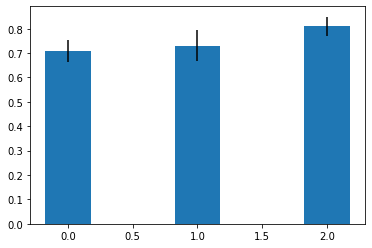

In [13]:
p1 = plt.bar(ind, means_SNN_L, width, yerr=std_SNN_L)

In [14]:
a = pd.read_csv('early_class_obj_class.csv')

In [15]:
a.head()

,Accuracy,Modality,SampleFile,Length,Loss function,t
0,0.05,Vision,5,0,Spike Count,0.00
1,0.05,Vision,5,1,Spike Count,0.02
2,0.05,Vision,5,2,Spike Count,0.04
3,0.05,Vision,5,3,Spike Count,0.06
4,0.05,Vision,5,4,Spike Count,0.08


In [16]:
b = a[a.t == 6.48]

In [17]:
b.tail()

,Accuracy,Modality,SampleFile,Length,Loss function,t
11699,0.750000,Tactile,5,324,Weighted Spike Count,6.48
12024,0.716667,Tactile,4,324,Weighted Spike Count,6.48
12349,0.700000,Tactile,3,324,Weighted Spike Count,6.48
12674,0.733333,Tactile,2,324,Weighted Spike Count,6.48
12999,0.700000,Tactile,1,324,Weighted Spike Count,6.48


In [18]:
tact_snn_L_w = b[(b.Modality == 'Tactile') & (b['Loss function'] == 'Weighted Spike Count')]['Accuracy'].values

In [19]:
tact_snn_L_w = np.array([0.75, 0.71666667, 0.7, 0.73333333, 0.7, 0.8, 0.688888, 0.66666, 0.78, 0.657, 0.6688])

In [20]:
np.mean(tact_snn_L_w), np.std(tact_snn_L_w)

(0.714668, 0.04470073057952675)

In [21]:
tact_snn_L = b[(b.Modality == 'Tactile') & (b['Loss function'] == 'Spike Count')]['Accuracy'].values

In [22]:
tact_snn_L = np.array([0.68333333, 0.749666 , 0.66666667, 0.7 , 0.7 , 0.705, 0.736666, 0.7057, 0.7057])

In [23]:
np.mean(tact_snn_L), np.std(tact_snn_L)

(0.7058591111111111, 0.02352543125751057)

In [24]:
vis_snn_L = b[(b.Modality == 'Vision') & (b['Loss function'] == 'Spike Count')]['Accuracy'].values

In [25]:
vis_snn_L = np.array([0.71666667, 0.71666667, 0.83333333, 0.7       , 0.6666  , 0.823333, 0.66666])

In [26]:
np.mean(vis_snn_L), np.std(vis_snn_L)

(0.7318942385714285, 0.0639763125554052)

In [27]:
vis_snn_L_w = b[(b.Modality == 'Vision') & (b['Loss function'] == 'Weighted Spike Count')]['Accuracy'].values

In [28]:
vis_snn_L_w = np.array([0.6 , 0.83333333, 0.73333333, 0.71666667, 0.73333333, 0.7533333, 0.69])

In [29]:
np.mean(vis_snn_L_w), np.std(vis_snn_L_w)

(0.722857137142857, 0.06498909404757731)

In [30]:
mm_snn_L = b[(b.Modality == 'Combined') & (b['Loss function'] == 'Spike Count')]['Accuracy'].values

In [31]:
mm_snn_L = np.array([0.86666667, 0.81666667, 0.82, 0.734, 0.8, 0.81666667])

In [32]:
mm_snn_L_w = b[(b.Modality == 'Combined') & (b['Loss function'] == 'Weighted Spike Count')]['Accuracy'].values

In [33]:
mm_snn_L_w = np.array([0.84       , 0.86       , 0.81666667, 0.73333333, 0.83333333,
       0.78333333, 0.8       , 0.75666667, 0.73333333, 0.8       ,
       0.85      , 0.83333333, 0.85       , 0.78333333, 0.76666])

In [34]:
np.mean(mm_snn_L_w), np.std(mm_snn_L_w)

(0.8026662213333332, 0.040846988683897176)

In [42]:
rests = [
[tact_snn_L, tact_snn_L_w, tact_ann, tact_cnn3d],
[vis_snn_L, vis_snn_L_w, vis_ann, vis_cnn3d],
[mm_snn_L, mm_snn_L_w, mm_ann, mm_cnn3d]
]

In [45]:
import pickle
pickle.dump(rests, open('obj_class_rests.pkl', 'wb'))